In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.datasets import load_digits

# For deep learning
import tensorflow as tf
from tensorflow import keras
from keras import layers

# For PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

2025-06-21 21:06:26.334951: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/asdfg/miniconda3/envs/cenv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


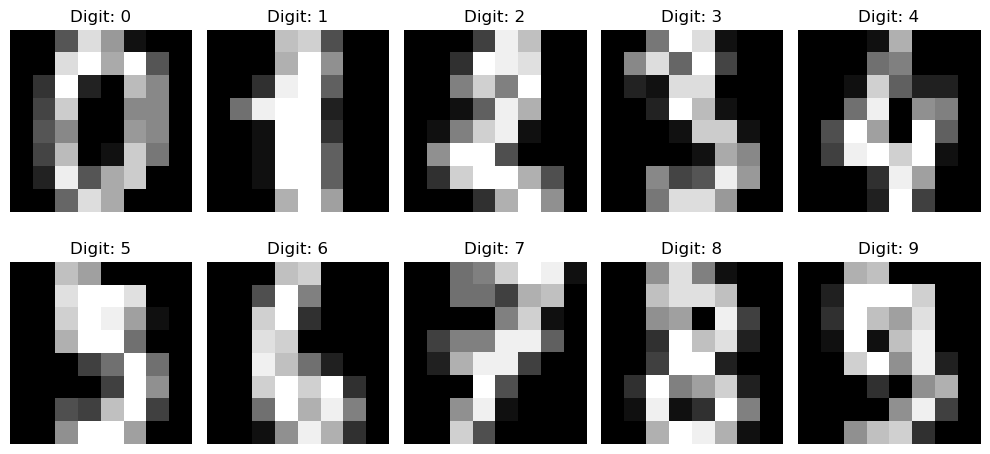

Digits dataset: 1797 samples, 64 features


In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)

# Load Digits dataset for classification
digits = load_digits()
X_digits = digits.data / 16.0
y_digits = digits.target

# Display sample digits
plt.figure(figsize=(10, 5))
for i in range(10):
   plt.subplot(2, 5, i+1)
   plt.imshow(digits.images[i], cmap='gray')
   plt.title(f'Digit: {digits.target[i]}')
   plt.axis('off')
plt.tight_layout()
plt.show()

# Print information about dataset
print(f"Digits dataset: {X_digits.shape[0]} samples, {X_digits.shape[1]} features")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

In [4]:
# Convert NumPy arrays to PyTorch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.long)

In [5]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(64,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

2025-06-21 21:07:51.220866: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-21 21:07:51.222482: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/30
45/45 [==============================] - 2s 31ms/step - loss: 1.8289 - accuracy: 0.5484 - val_loss: 1.3201 - val_accuracy: 0.7222
Epoch 2/30
45/45 [==============================] - 1s 16ms/step - loss: 0.8511 - accuracy: 0.8775 - val_loss: 0.5142 - val_accuracy: 0.9056
Epoch 3/30
45/45 [==============================] - 1s 26ms/step - loss: 0.3818 - accuracy: 0.9283 - val_loss: 0.2848 - val_accuracy: 0.9278
Epoch 4/30
45/45 [==============================] - 1s 13ms/step - loss: 0.2477 - accuracy: 0.9513 - val_loss: 0.2058 - val_accuracy: 0.9500
Epoch 5/30
45/45 [==============================] - 1s 30ms/step - loss: 0.1850 - accuracy: 0.9617 - val_loss: 0.1690 - val_accuracy: 0.9528
Epoch 6/30
45/45 [==============================] - 2s 37ms/step - loss: 0.1489 - accuracy: 0.9673 - val_loss: 0.1487 - val_accuracy: 0.9639
Epoch 7/30
45/45 [==============================] - 1s 22ms/step - loss: 0.1365 - accuracy: 0.9694 - val_loss: 0.1321 - val_accuracy: 0.9639
Epoch 8/30
45

In [18]:
# Model Evaluation
keras_accuracy = np.mean(history.history['accuracy'])

In [8]:
input_dim = X_train_t.shape[1]
hidden_dim=32

class MLPClassifier(nn.Module):
    def __init__(self, input_size=input_dim, hidden_size=hidden_dim, num_classes=10):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Hidden layer + ReLU
        x = nn.functional.relu(self.fc1(x))
        # Output layer (no activation, CrossEntropyLoss will apply softmax internally)
        x = self.fc2(x)
        return x

In [10]:
ts_model = MLPClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    ts_model.parameters(),
    lr=0.01,
    betas=(0.9,0.999),
    eps=1e-8
)

In [11]:
# Train the model
train_ds = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)

num_epochs = 50
for epoch in range(num_epochs):
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = ts_model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/50], Loss: 0.0338
Epoch [20/50], Loss: 0.0065
Epoch [30/50], Loss: 0.0015
Epoch [40/50], Loss: 0.0045
Epoch [50/50], Loss: 0.0000


In [12]:
# Model Evaluation
ts_model.eval()
with torch.no_grad():
    outputs_test = ts_model(X_test_t)
    ts_predicted = torch.argmax(outputs_test, dim=1)
    ts_accuracy = (ts_predicted == y_test_t).sum().item() / y_test_t.size(0)

In [19]:
print(f'Original Model Accuracy: {keras_accuracy:.4f}')
print(f'MLP Model Accuracy: {ts_accuracy:.4f}')

Original Model Accuracy: 0.9676
MLP Model Accuracy: 0.9639


12/12 [==============================] - 0s 21ms/step


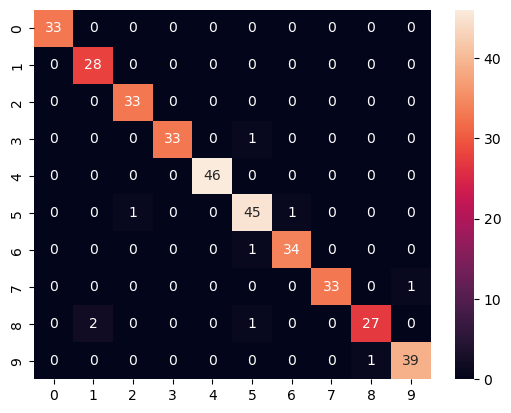

In [20]:
predictions = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()